# ___CIFAR10___
-----------------

In [137]:
# https://www.cs.toronto.edu/~kriz/cifar.html
# https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch
# https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [139]:
import os
import pickle
from typing import override
from PIL import Image

import numpy as np
np.random.seed(2025 - 6 - 17)
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset

In [7]:
os.listdir(r"./cifar-10-batches-py/")

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [16]:
# CIFAR10 metedata

with open(file=r"./cifar-10-batches-py/batches.meta", mode="rb") as fp:
    cifar10_metadata = pickle.load(fp)

cifar10_metadata

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [22]:
# image batches
os.listdir(r"./cifar-10-batches-py/")[1:6]

['data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5']

In [41]:
cifar10_batches_unpickled = []

for batch_name in os.listdir(r"./cifar-10-batches-py/")[1:6]:
    with open(file=f"./cifar-10-batches-py/{batch_name}", mode="rb") as fp:
        cifar10_batches_unpickled.append(pickle.load(fp, encoding="bytes"))

In [100]:
with open(file=r"./cifar-10-batches-py/test_batch", mode="rb") as fp:
    cifar10_test_unpickled = pickle.load(fp, encoding="bytes")

In [101]:
len(cifar10_batches_unpickled)

5

In [103]:
cifar10_test_unpickled;

In [51]:
list(map(lambda _: _.keys(), cifar10_batches_unpickled))

[dict_keys([b'batch_label', b'labels', b'data', b'filenames']),
 dict_keys([b'batch_label', b'labels', b'data', b'filenames']),
 dict_keys([b'batch_label', b'labels', b'data', b'filenames']),
 dict_keys([b'batch_label', b'labels', b'data', b'filenames']),
 dict_keys([b'batch_label', b'labels', b'data', b'filenames'])]

In [50]:
list(map(lambda _: _.get(b"batch_label"), cifar10_batches_unpickled))

[b'training batch 1 of 5',
 b'training batch 2 of 5',
 b'training batch 3 of 5',
 b'training batch 4 of 5',
 b'training batch 5 of 5']

In [53]:
# the first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue
cifar10_batches_unpickled[0][b"data"]

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]],
      shape=(10000, 3072), dtype=uint8)

In [59]:
32*32

1024

In [67]:
np.column_stack(cifar10_batches_unpickled[0][b"data"][0].reshape((3, 1024)))

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       ...,
       [216, 184, 140],
       [151, 118,  84],
       [123,  92,  72]], shape=(1024, 3), dtype=uint8)

In [71]:
np.column_stack(cifar10_batches_unpickled[0][b"data"][0].reshape((3, 1024))).reshape((32, 32, 3))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [85]:
np.random.randint(low=0, high=5)

3

In [112]:
axes.shape

(10, 20)

In [128]:
np.where(np.array(cifar10_batches_unpickled[0][b"labels"]) == 8)[0]

array([   8,   62,   69, ..., 9960, 9972, 9975], shape=(1025,))

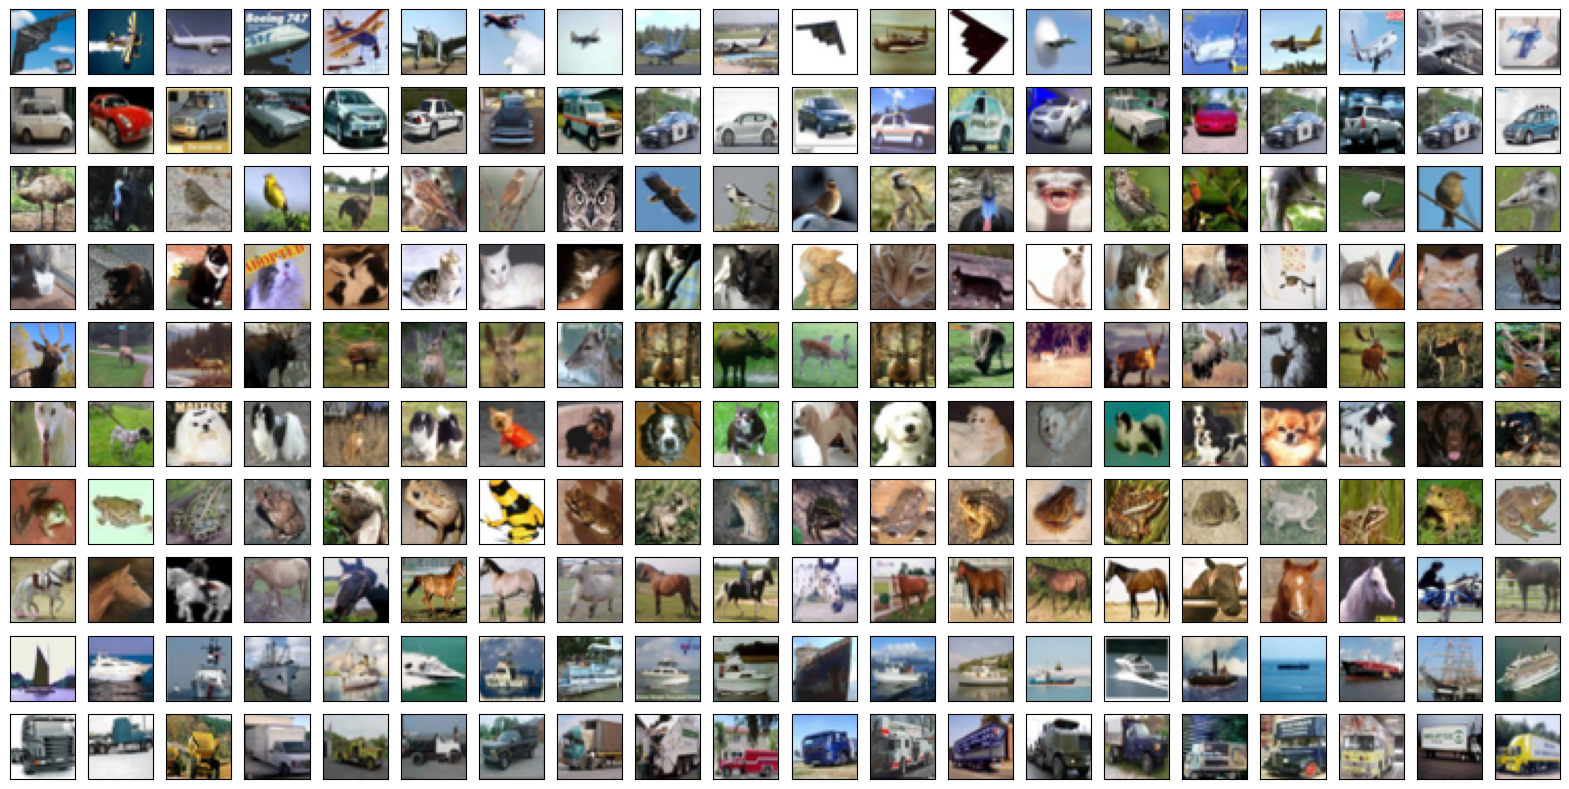

In [138]:
fig, axes = plt.subplots(nrows=10, ncols=20)
fig.set_size_inches(20, 10)
for (LABEL_GROUP, row) in enumerate(axes):
    BATCH_NO = np.random.randint(low=0, high=5)
    SELECTED_IMAGE_GROUP_OFFSETS = np.where(np.array(cifar10_batches_unpickled[BATCH_NO][b"labels"]) == LABEL_GROUP)[0]
    for axis in row:
        axis.imshow(
            np.column_stack(
                cifar10_batches_unpickled[BATCH_NO][b"data"][np.random.choice(SELECTED_IMAGE_GROUP_OFFSETS)].reshape((3, 1024))
            ).reshape((32, 32, 3))
        )
        axis.set_xticks([])
        axis.set_yticks([])
plt.show()

In [136]:
# define our CNN

class Cifar10CNN(nn.Module):

    @override
    def __init__(self, nclasses: int) -> None:
        super(Cifar10CNN, self).__init__()

        self.__n_classes: int = nclasses
        self.__conv_layer_01 = nn.Conv2d(kernel_size=3, # 3 x 3 convolution kernel
                                         in_channels=3, # R, G & B
                                         out_channels=32)
        
        self.__conv_layer_02 = nn.Conv2d(kernel_size=3, # 3 x 3 convolution kernel
                                         in_channels=32, # out channels of the previous layer
                                         out_channels=32)

In [217]:
# what does a convolution kernel do to an image???

image = np.array(Image.open(r"./colors.jpg"))

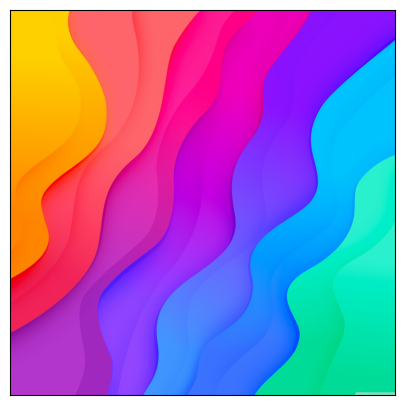

In [218]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
axes.imshow(image)
axes.set_xticks([])
axes.set_yticks([])
plt.show()

In [219]:
image.shape

(3840, 3840, 3)

In [220]:
image

array([[[254, 208,   0],
        [254, 208,   0],
        [254, 208,   0],
        ...,
        [137,  17, 254],
        [137,  17, 254],
        [137,  17, 254]],

       [[254, 208,   0],
        [254, 208,   0],
        [254, 208,   0],
        ...,
        [138,  18, 255],
        [138,  18, 255],
        [138,  18, 255]],

       [[255, 209,   1],
        [255, 209,   1],
        [255, 209,   1],
        ...,
        [138,  18, 255],
        [138,  18, 255],
        [138,  18, 255]],

       ...,

       [[178,  54, 204],
        [178,  54, 204],
        [178,  54, 204],
        ...,
        [137, 225, 200],
        [137, 225, 200],
        [137, 225, 200]],

       [[179,  55, 205],
        [178,  54, 204],
        [178,  54, 204],
        ...,
        [137, 225, 200],
        [137, 225, 200],
        [137, 225, 200]],

       [[179,  55, 205],
        [178,  54, 204],
        [177,  53, 203],
        ...,
        [137, 225, 200],
        [137, 225, 200],
        [137, 225, 200]]

In [197]:
# torch.tensor(image, dtype=torch.float32)#.shape

In [221]:
torch.tensor(image, dtype=torch.float32).shape

torch.Size([3840, 3840, 3])

In [230]:
# transform this into 3 (RGB) 3840 x 3840 matrices

rgb_image = np.column_stack(np.vstack(image)).reshape((3, 3840, 3840))

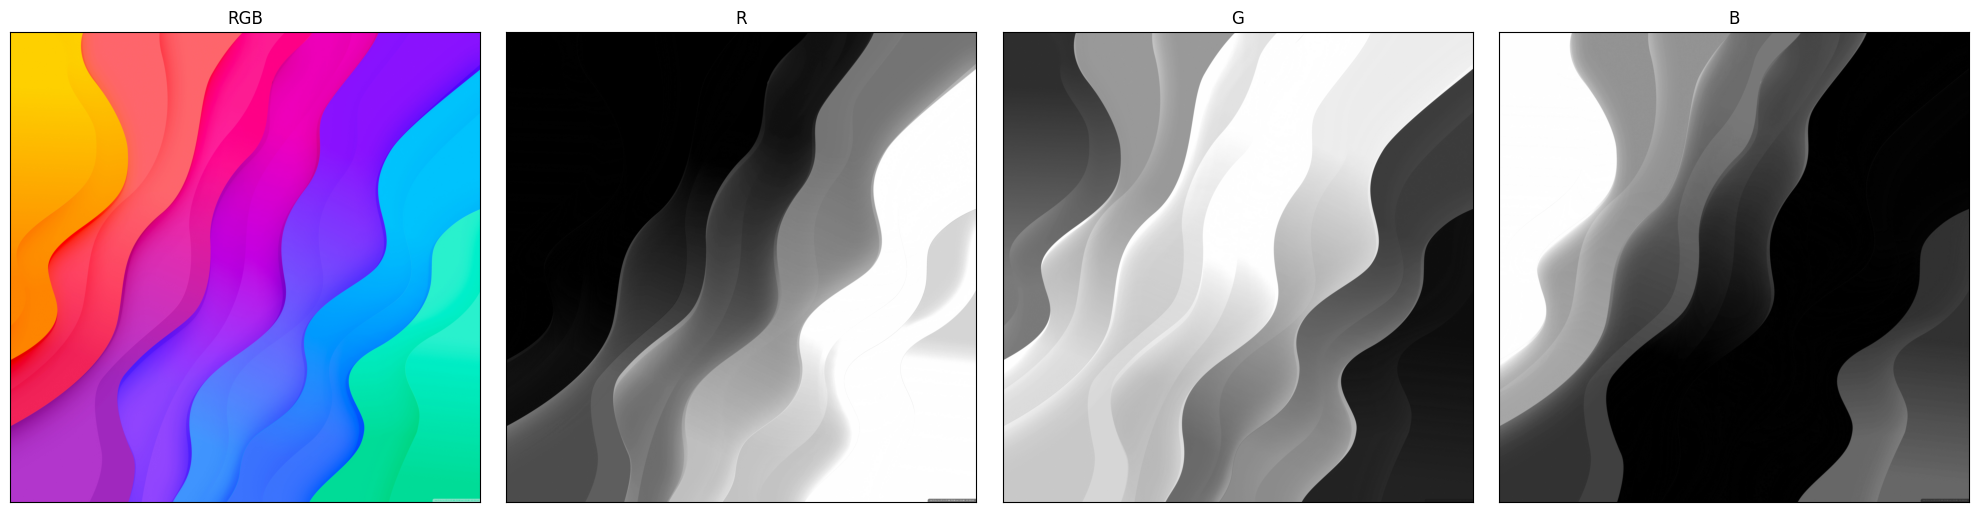

In [231]:
fig, axes = plt.subplots(ncols=4)
fig.set_size_inches(20, 5)

axes[0].imshow(image)
axes[0].set_xticks([])
axes[0].set_yticks([])

for (i, axis) in enumerate(axes[1:], start=0):
    axes[i+1].imshow(rgb_image[i], cmap="binary")
    axes[i+1].set_xticks([])
    axes[i+1].set_yticks([])

for (c, axis) in zip(("RGB", 'R', 'G', 'B'), axes):
    axis.set_title(c)

plt.tight_layout()
plt.show()

In [232]:
rgb_tensor = torch.tensor(rgb_image, dtype=torch.float32)

In [234]:
3840 / 40

96.0

In [239]:
convolved = nn.Conv2d(in_channels=3, kernel_size=20, out_channels=3)(rgb_tensor).detach().numpy()

In [240]:
convolved

array([[[-214.43886   , -214.4345    , -214.39142   , ...,
         -121.14085   , -121.351494  , -121.544785  ],
        [-214.46643   , -214.4957    , -214.41367   , ...,
         -121.14709   , -120.9814    , -121.375824  ],
        [-214.46028   , -214.29202   , -214.49884   , ...,
         -121.69232   , -121.91845   , -121.63434   ],
        ...,
        [-152.92519   , -152.37752   , -152.05675   , ...,
         -130.1157    , -131.02951   , -134.49472   ],
        [-152.76703   , -152.64778   , -152.82707   , ...,
         -129.1889    , -131.38441   , -135.15709   ],
        [-152.37422   , -152.67336   , -152.64989   , ...,
         -133.15775   , -133.53389   , -135.86711   ]],

       [[ -90.31913   ,  -90.435455  ,  -90.633385  , ...,
           46.045807  ,   46.151375  ,   45.93974   ],
        [ -90.70758   ,  -90.7651    ,  -90.84361   , ...,
           45.63683   ,   46.6031    ,   46.38355   ],
        [ -90.82502   ,  -90.87821   ,  -91.025185  , ...,
           45.

In [242]:
convolved[0]

array([[-214.43886 , -214.4345  , -214.39142 , ..., -121.14085 ,
        -121.351494, -121.544785],
       [-214.46643 , -214.4957  , -214.41367 , ..., -121.14709 ,
        -120.9814  , -121.375824],
       [-214.46028 , -214.29202 , -214.49884 , ..., -121.69232 ,
        -121.91845 , -121.63434 ],
       ...,
       [-152.92519 , -152.37752 , -152.05675 , ..., -130.1157  ,
        -131.02951 , -134.49472 ],
       [-152.76703 , -152.64778 , -152.82707 , ..., -129.1889  ,
        -131.38441 , -135.15709 ],
       [-152.37422 , -152.67336 , -152.64989 , ..., -133.15775 ,
        -133.53389 , -135.86711 ]], shape=(3821, 3821), dtype=float32)

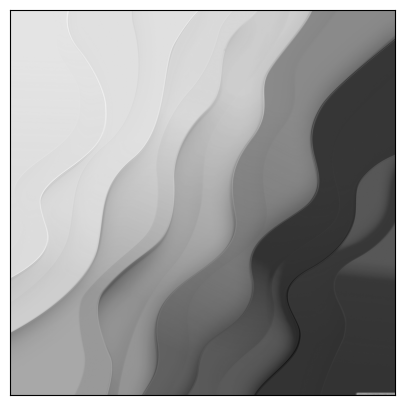

In [248]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20, 5)

for (i, axis) in enumerate(axes, start=0):
    axes[i+1].imshow(rgb_image[i], cmap="binary")
    axes[i+1].set_xticks([])
    axes[i+1].set_yticks([])

for (c, axis) in zip(("RGB", 'R', 'G', 'B'), axes):
    axis.set_title(c)

plt.tight_layout()
plt.show()